# **Predicting House Prices**

## Introduction

* **Objective**: The goal of this study is to accurately predict house prices using a variety of features from a given dataset.

* **Importance**: Predicting house prices is a crucial task that can benefit real estate professionals, buyers, and sellers by providing data-driven insights. These predictions help in making informed decisions regarding property investments, market evaluations, and pricing strategies.

## The dataset

We begin by loading the dataset and examining its contents to gain an initial understanding.

In [142]:
import pandas as pd
import numpy as np

df = pd.read_csv("housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


### About the dataset
The dataset originates from the [USA Housing dataset](https://github.com/miirshe/USA-Housing-Analysis-and-Prediction-Price/blob/main/USA_Housing.csv), containing information on housing in the USA:

- **Avg. Area Income**: Average income of residents in the area.
- **Avg. Area House Age**: Average age of houses in the area.
- **Avg. Area Number of Rooms**: Average number of rooms per house in the area.
- **Avg. Area Number of Bedrooms**: Average number of bedrooms per house in the area.
- **Area Population**: Population of the area.
- **Price**: Sale price of the house.
- **Address**: Address of the house.

## 1. Data Exploration

In [143]:
df.shape # The shape of the dataset

(5000, 7)

In [144]:
# Informations on dataset structure (type of variables, missing values, etc...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4950 non-null   float64
 1   Avg. Area House Age           4950 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Data Shape and Types**:

The DataFrame has **5000** rows and **7** columns, representing records of house data, with each row describing a unique house. It includes:

- **6 numerical** columns (float64): These columns hold quantitative data on housing attributes like income, house age, number of rooms, number of bedrooms, population, and price.
- **1 text** column (object): The Address column provides the address of each house.

Some columns contain missing values, with the exact counts as follows:

- `Avg. Area Income`: 10 missing values
- `Avg. Area House Age`: 10 missing values

This summary helps assess the dataset's readiness for analysis, noting the missing data in numerical columns and ensuring correct data type usage.

In [145]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4950.000000,4950.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68564.476007,5.976582,7.127145,3.981330,36914.758824,1.232073e+06
std,10658.212822,0.990699,1.713966,1.234137,12229.845819,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61472.373312,5.322274,6.308340,3.140000,29498.715965,9.975771e+05
50%,68790.560350,5.970429,7.015044,4.050000,36332.868060,1.232669e+06
75%,75785.345715,6.648513,7.691630,4.490000,43136.707277,1.471210e+06
max,107701.748400,9.519088,20.963376,6.500000,108490.548116,2.469066e+06


**Descriptive Statistics**:

The descriptive statistics reveal that the dataset consists of 5000 records with attributes related to housing and area demographics.

The average house price is approximately \$1.23 million, with a significant range from about \$15,939 to \$2.47 million. On average, houses have around 7 rooms and nearly 4 bedrooms, with house ages averaging about 6 years. Area income averages around \$68,583, while the average population of the areas is approximately 36,164.

The data shows some variation in these attributes, with standard deviations indicating moderate to high dispersion from the mean values.

## 2. Data Visualization

* **Price Distribution**: This involves creating a visual representation to show how house prices are spread out.

* **Feature Relationships**: This refers to plotting graphs that show how different features relate to the target variable, which in this case is the house price.

* **Correlation Matrix**: This is a heatmap that shows the correlation coefficients between pairs of features. Correlation coefficients range from -1 to 1, where -1 indicates a strong negative relationship, 1 indicates a strong positive relationship, and 0 means no relationship.

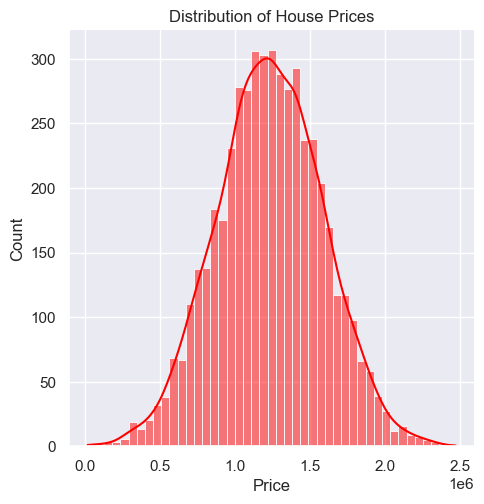

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')
sns.displot(df["Price"], kde=True, color='red')
plt.title("Distribution of House Prices")
plt.show()

The histogram shows a slight right skew, indicating that while most houses are priced in a moderate range, there are a few high-priced outliers, which may represent luxury properties or homes in exceptionally desirable areas.

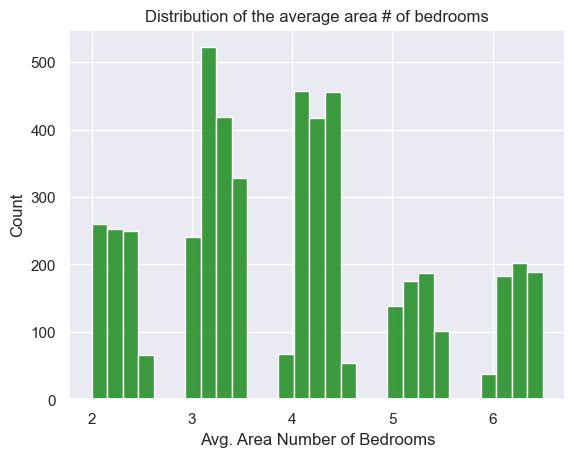

In [147]:
sns.histplot(df['Avg. Area Number of Bedrooms'], color='green')
plt.title("Distribution of the average area # of bedrooms")
plt.show()

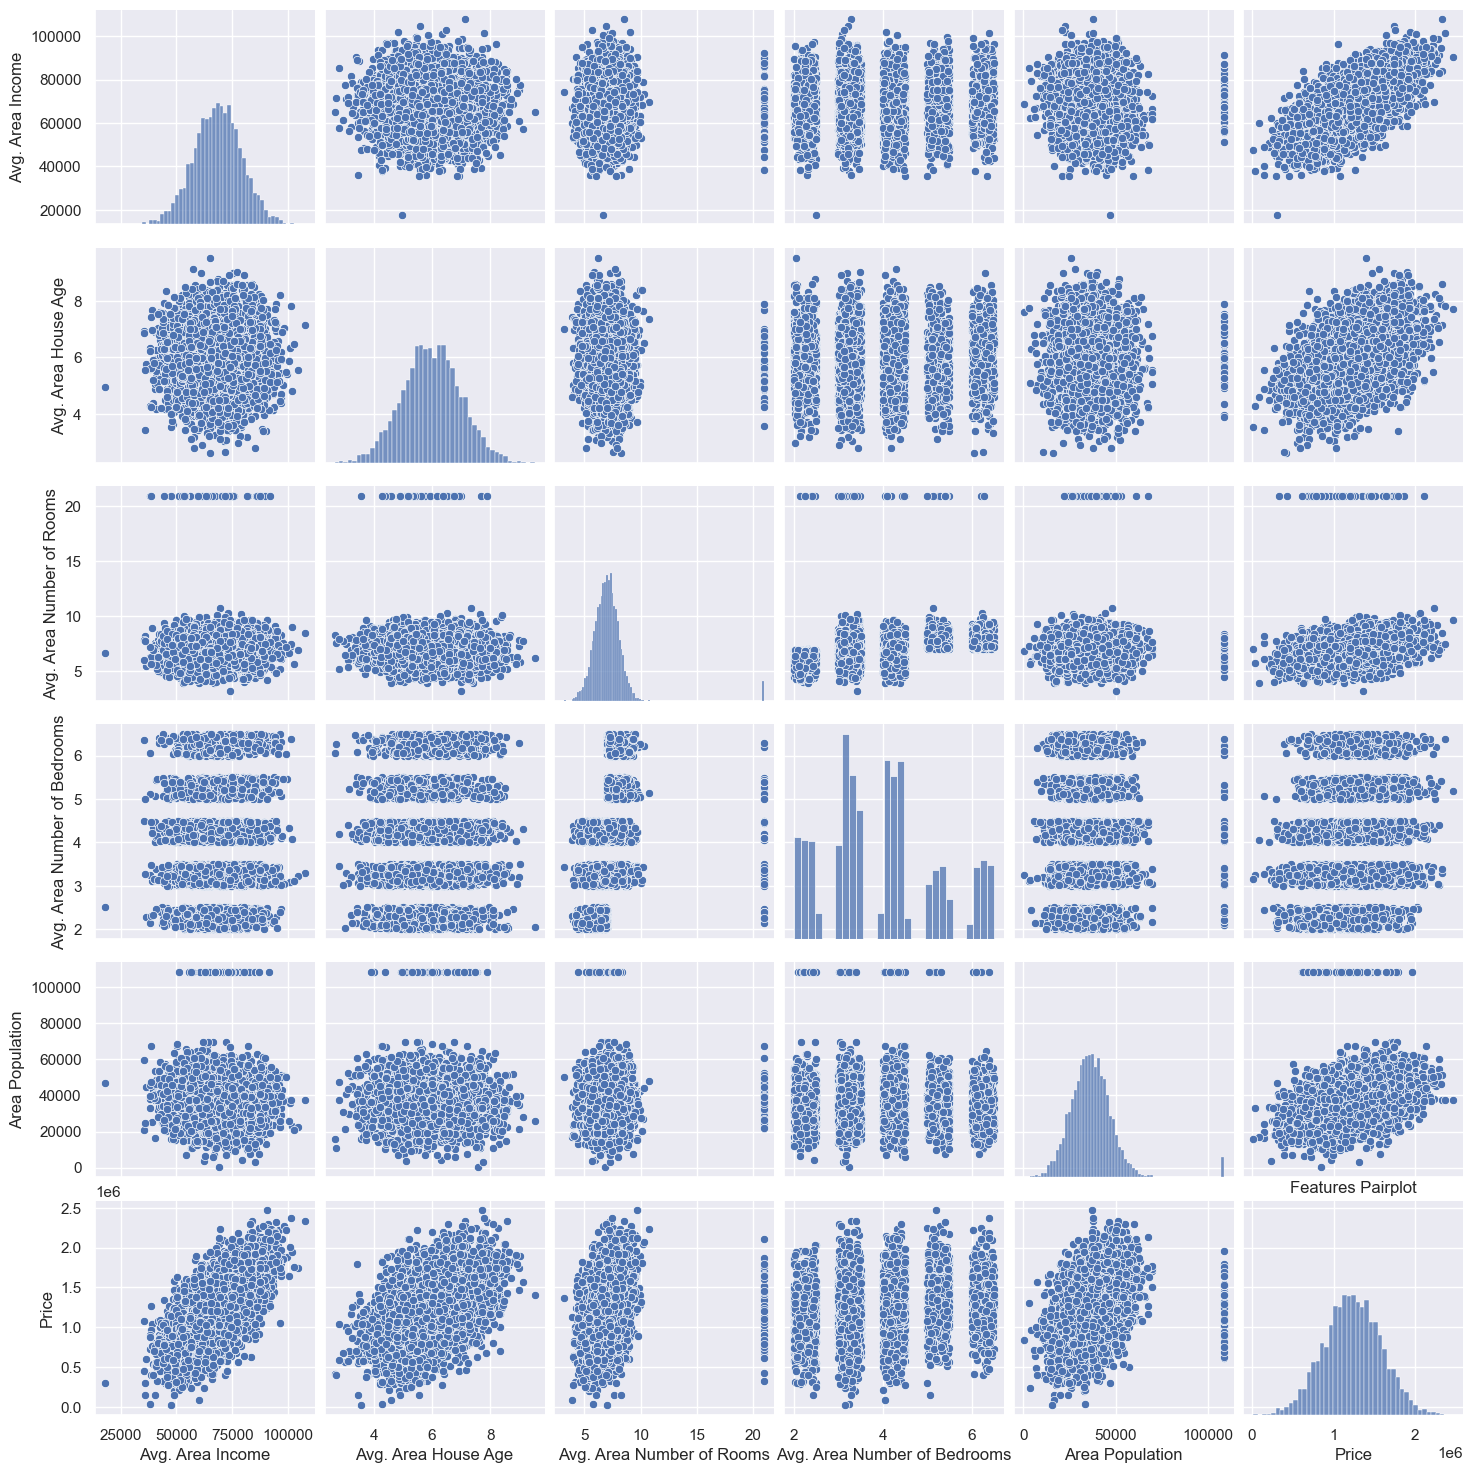

In [148]:
sns.pairplot(df.drop(columns=['Address']))
plt.title("Features Pairplot")
plt.show()

This plot reveals some outliers in some variables (rooms number & population), with values significantly exceeding the typical range. This extreme value may skew analysis and should be carefully considered or adjusted.

Next, we can examine how the **Price** variable relates to other housing attributes:

1. **Price vs. Avg. Area Income**: There is a positive relationship between **Price** and **Avg. Area Income**, suggesting that higher average incomes in an area are generally associated with higher house prices. This makes sense, as areas with wealthier populations may drive up housing demand and prices.

2. **Price vs. Avg. Area House Age**: There doesn't seem to be a clear linear relationship between **Price** and **Avg. Area House Age**. Houses in both older and newer neighborhoods seem to have a wide range of prices. However, most data points are concentrated in a narrow range of house ages, showing that the majority of homes are relatively new.

3. **Price vs. Avg. Area Number of Rooms**: There appears to be a slight positive trend, indicating that homes with more rooms tend to have higher prices. Outliers in this plot represent homes with a much higher number of rooms but still within a normal price range, possibly due to other factors such as location or quality.

4. **Price vs. Avg. Area Number of Bedrooms**: This plot shows less variation, with most data points clustering around a typical range of bedrooms. It seems that an increasing number of bedrooms does not strongly influence the price, likely because bedrooms alone don't determine home size or value as much as the total area and number of rooms.

5. **Price vs. Area Population**: There is no obvious correlation between **Price** and **Area Population**. Prices are high in areas with both low and high populations, suggesting that population density alone does not dictate housing prices. Other factors like income and amenities might play a more significant role.

## 3. Preprocessing

- **Feature selection**: Identify and separate the predictor variables (X) from the target variable (y) to prepare for model training.

- **Spliting the data**: First, we are going to split the data into train and test datasets

- **Handling missing values**: This step involves checking for any missing values and addressing them appropriately to ensure data integrity.
  
- **Removing irrelevant columns or aberant values**: Eliminate columns that do not contribute to the model's performance, such as the "Address" column.

- **Feature scaling**: Standardize the numerical features to bring them to a common scale, improving model performance.

In [149]:
# First we are going to drop the Adress variable
data = df.drop(columns=['Address'])

Next we are going to slit the data

In [150]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = .2, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

X_train = train.drop(columns=['Price'])
y_train = train['Price']

X_test = test.drop(columns=['Price'])
y_test = test['Price']

Now we are going to deal with missing and aberant values

In [151]:
X_train.isna().sum() # Only Avg. Area Income and Avg. Area House Age have missing values

Avg. Area Income                38
Avg. Area House Age             39
Avg. Area Number of Rooms        0
Avg. Area Number of Bedrooms     0
Area Population                  0
dtype: int64

To correct the missing & aberrant values and standardize our features, we will use the pipeline `preprocess` (.../module.py) that will handle all this preprocessing

In [152]:
from module import preprocess

In [153]:
X_train = preprocess(X_train, True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4000 non-null   float64
 1   Avg. Area House Age           4000 non-null   float64
 2   Avg. Area Number of Rooms     4000 non-null   float64
 3   Avg. Area Number of Bedrooms  4000 non-null   float64
 4   Area Population               4000 non-null   float64
dtypes: float64(5)
memory usage: 156.4 KB


In [154]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,-0.201935,-0.134224,-0.135748,0.120386,-0.855090
1,-1.447717,0.443209,0.821130,-0.556489,1.196529
2,-0.367896,0.480400,1.748820,0.030680,-0.329689
3,-0.148503,0.116029,0.235280,-0.760367,-0.923412
4,0.643005,2.280055,0.447049,-0.458628,0.135554


Well ! We have finished the preprocessing step. Our data are clean and we can impleting our predictive models

## 4. Implementing models
In this step, we will explore two machine learning models to address our problem: Linear Regression and K-Nearest Neighbors (KNN).

**Linear Regression**

Linear Regression is a model that assumes a linear relationship between input features and the target variable. It fits a line to minimize prediction errors, making it a simple and interpretable approach. This model is a good baseline for housing price prediction, as it provides insights into whether a straightforward linear relationship exists. It's also computationally efficient, making it suitable for initial experimentation.

**K-Nearest Neighbors (KNN)**

KNN predicts based on the values of the closest ( k ) neighbors, making it flexible and able to capture non-linear relationships. KNN is chosen over Support Vector Machine (SVM) here for its simplicity and intuitive nature, as well as its ability to adjust the bias-variance trade-off by tuning ( k ). This model is useful if local patterns in the data are important for accurate predictions.

### Model 1: **Linear Regression**

First, we train the model on the training set and perform cross-validation to evaluate its accuracy and generalizability.

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

mse_scores = cross_val_score(reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(reg_model, X_train, y_train, cv=5, scoring='r2')

print(f"MSE = {mse_scores} and r2 = {r2_scores}")
print(f"MSE = {np.abs(mse_scores.mean())} and r2 = {r2_scores.mean()}")

MSE = [-1.61044754e+10 -1.83531183e+10 -1.77191668e+10 -1.73924723e+10
 -1.85693823e+10] and r2 = [0.86308742 0.84356657 0.85830104 0.87160284 0.8566364 ]
MSE = 17627723018.661324 and r2 = 0.8586388540129901


In [156]:
from sklearn.metrics import mean_squared_error, r2_score
X_test = preprocess(X_test, False)
X_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,-0.652595,1.084229,-0.549893,-0.597265,0.800651
1,-1.113742,0.954685,-0.060218,-0.695126,0.763159
2,0.152010,0.800571,-0.323703,-1.608499,-0.713712
3,0.067113,0.338201,0.908439,0.242713,-1.207687
4,0.424060,-2.664451,-0.495129,-1.225209,1.505050


In [157]:
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f"MSE = {mse} and r2 = {r2}")

MSE = 15350399432.796759 and r2 = 0.857858294711122


The model seems to perform reasonably well, based on the cross-validation results:

- **MSE (Mean Squared Error)**: The MSE is relatively high, which suggests that there is a significant average error in the predictions. This may indicate that the model might not be capturing all the relevant patterns in the data
  
- **R² Score**: The R² value indicate that the model explains around 86% of the variance in the target variable.

Overall, the Linear Regression model captures a good amount of variance but leaves substantial error.

### Model 2: **K-Nearest Neighbors (KNN)**

In [158]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

mse_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='r2')

print(f"MSE = {mse_scores} and r2 = {r2_scores}")
print(f"MSE = {np.abs(mse_scores.mean())} and r2 = {r2_scores.mean()}")

MSE = [-2.31833053e+10 -2.33833078e+10 -2.51049419e+10 -2.55491873e+10
 -2.55660598e+10] and r2 = [0.80290658 0.80069157 0.7992375  0.81138719 0.80261905]
MSE = 24557360439.027645 and r2 = 0.8033683795233371


In [159]:
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f"MSE = {mse} and r2 = {r2}")

MSE = 22565570117.22936 and r2 = 0.7492062633149179


The MSE of 22565570117.22936 indicates the average squared error, and the R-squared of 0.7492 means the model explains about 74.92% of the variance in the target variable. This suggests a reasonable but not perfect fit.

## Conclusion

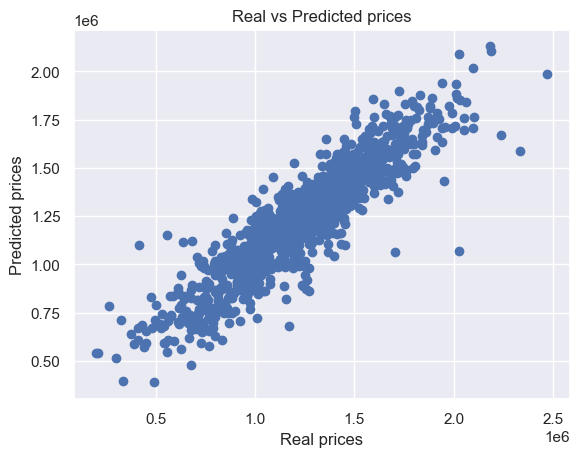

In [160]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real prices")
plt.ylabel("Predicted prices")
plt.title("Real vs Predicted prices")
plt.show()

In this study, we explored two predictive models, **Linear Regression** and **K-Nearest Neighbors (KNN)**, to estimate housing prices based on various features. The **Linear Regression model** demonstrated a reasonable performance with an R² score of approximately 85-86%, indicating that it explains a substantial portion of the variance in housing prices. However, the MSE was relatively high, suggesting there is still room for improvement and that the model might not fully capture all patterns in the data.

The **K-Nearest Neighbors model** showed a slightly lower R² score of about 75%, indicating a weaker fit to the data compared to Linear Regression. This suggests that KNN may not be as effective for this dataset, possibly due to the high dimensionality or the specific patterns within the data that are better captured by a linear approach.

Overall, **Linear Regression** proved to be the more effective model for this study, capturing more variance in the target variable with a better balance of accuracy and interpretability. Future work could explore more complex models, such as ensemble methods, or apply feature engineering to improve performance further.

## References

* [Dataset link](https://github.com/miirshe/USA-Housing-Analysis-and-Prediction-Price/blob/main/USA_Housing.csv)

* [Regression Sk Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)